A PCA i clústering amb k-means.

1. A partir de la base de dades Iris, amb les seves quatre característiques, obteniu les dues primeres components principals. Representau gràficament els punts de dades a partir de les dues components principals obtingudes. Com que estam realitzant aprenentatge no supervisat, no fa falta que tengueu en compte les etiquetes de classe.

2. Distribuïu les dades en tres clústers. Representau-les ara amb colors que indiquin el clúster al qual pertanyen.

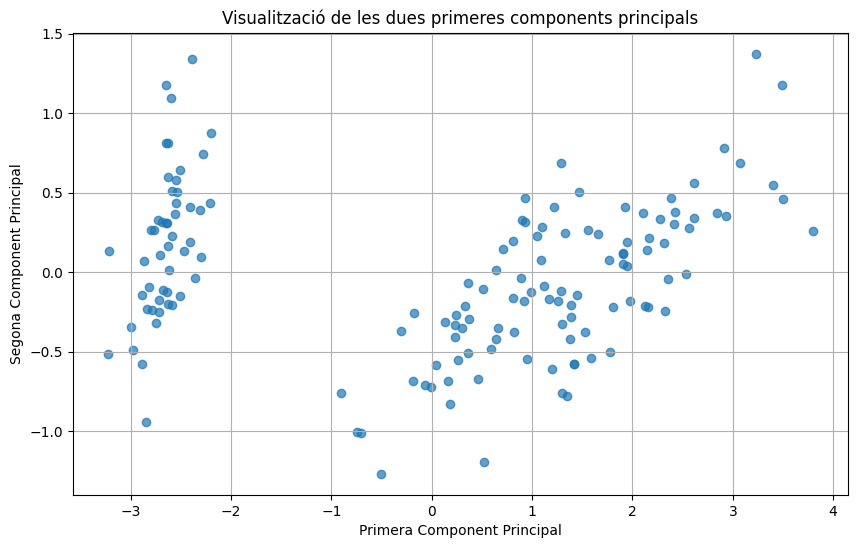

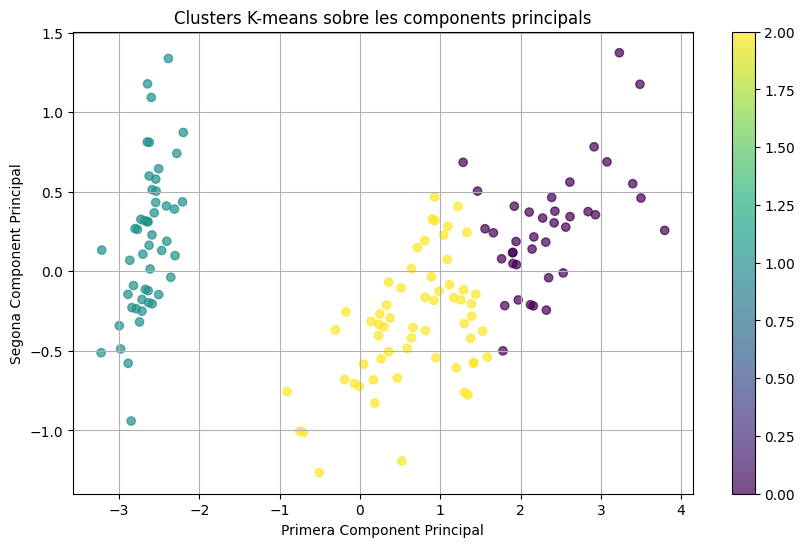


Variància explicada per cada component principal:
PC1: 0.9246
PC2: 0.0531
Variància total explicada: 0.9777


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

iris = load_iris()
scaler = StandardScaler()
X_scaled = iris.data

# 1. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Primera Component Principal')
plt.ylabel('Segona Component Principal')
plt.title('Visualització de les dues primeres components principals')
plt.grid(True)
plt.show()

# 2. K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Primera Component Principal')
plt.ylabel('Segona Component Principal')
plt.title('Clusters K-means sobre les components principals')
plt.colorbar(scatter)
plt.grid(True)
plt.show()

print("\nVariància explicada per cada component principal:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Variància total explicada: {sum(pca.explained_variance_ratio_):.4f}")

B Clústering jeràrquic

3. Representau el dendrograma del clústering jeràrquic de les mateixes dades obtingudes a la pregunta 1.

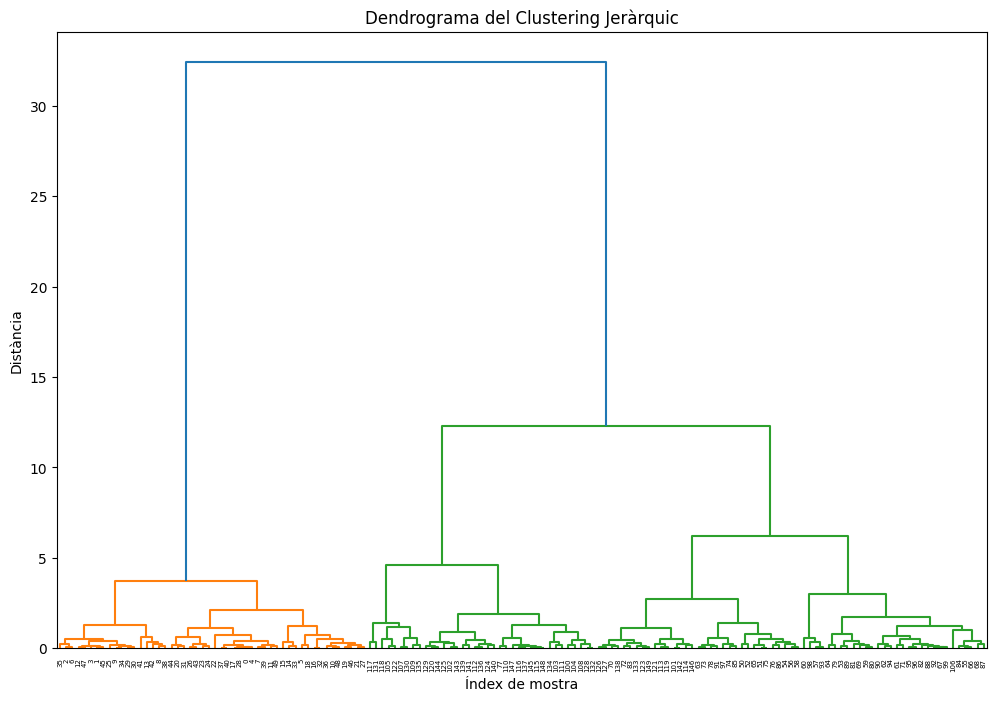

In [ ]:
# 3. Clustering jeràrquic
linkage_matrix = linkage(X_pca, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma del Clustering Jeràrquic')
plt.xlabel('Índex de mostra')
plt.ylabel('Distància')
plt.show()

C DBSCAN

4. Aplicau l'algorisme de clusterització DBSCAN a unes dades amb forma de dos cercles concèntrics. Podeu guiar-vos amb l'exemple següent.

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

L'algorisme aconsegueix separar els dos clústers, interior i exterior?

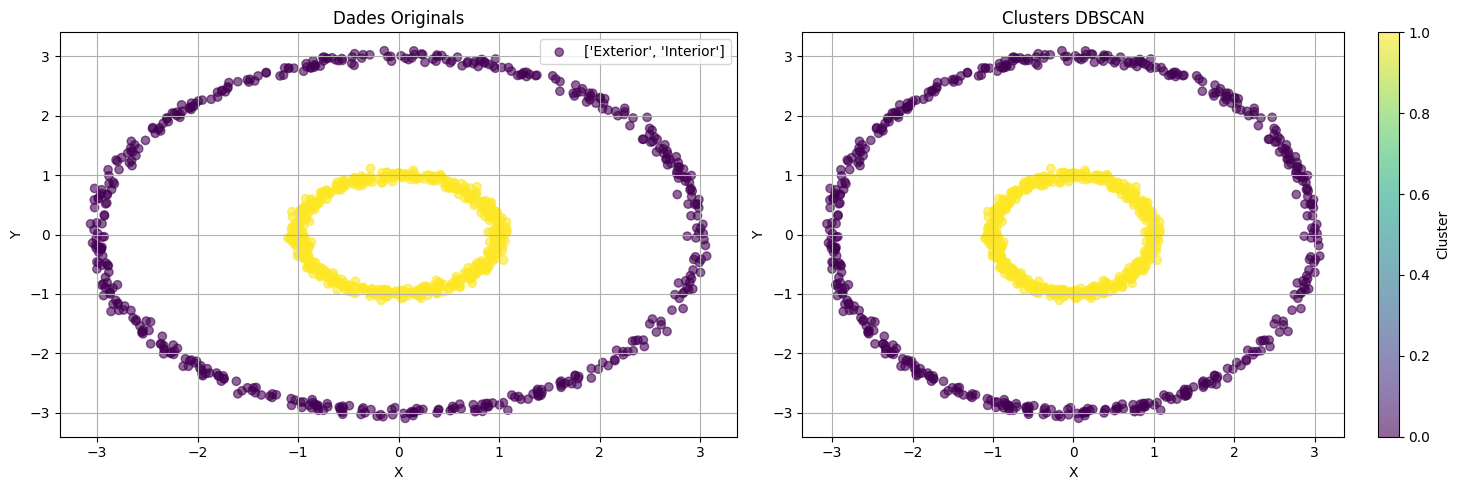


Nombre de clusters trobats: 2
Nombre de punts considerats soroll: 0

Punts de soroll: 0
Punts en cluster 0: 500
Punts en cluster 1: 500


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def generate_concentric_circles(n_samples=1000, noise=0.05):
    n_out = n_samples // 2
    theta_out = np.random.uniform(0, 2*np.pi, n_out)
    r_out = 3 + np.random.normal(0, noise, n_out)
    x_out = r_out * np.cos(theta_out)
    y_out = r_out * np.sin(theta_out)

    n_in = n_samples - n_out
    theta_in = np.random.uniform(0, 2*np.pi, n_in)
    r_in = 1 + np.random.normal(0, noise, n_in)
    x_in = r_in * np.cos(theta_in)
    y_in = r_in * np.sin(theta_in)

    X = np.vstack([np.column_stack([x_out, y_out]),
                   np.column_stack([x_in, y_in])])

    y = np.hstack([np.zeros(n_out), np.ones(n_in)])

    return X, y

X, y_true = generate_concentric_circles(n_samples=1000, noise=0.05)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis',
            alpha=0.6, label=['Exterior', 'Interior'])
plt.title('Dades Originals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis',
            alpha=0.6)
plt.title('Clusters DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'\nNombre de clusters trobats: {n_clusters}')
print(f'Nombre de punts considerats soroll: {n_noise}')

for i in range(-1, max(clusters) + 1):
    n_points = np.sum(clusters == i)
    if i == -1:
        print(f'\nPunts de soroll: {n_points}')
    else:
        print(f'Punts en cluster {i}: {n_points}')

D Quantització de color

5. El clústering es pot aplicar al processament d'imatges substituïnt cada valor de color pel centroide més proper. Si s'utilitzen molts de valors, la imatge processada serà una versió comprimida de l'original que en retendrà molta fidelitat. A mesura que es redueix el nombre de clústers, la distorsió és més evident a ull nu. Al cas extrem de considerar només dos valors, estaríem codificant cada píxel amb només un bit, que es pot fer servir per codificar per exemple blanc i negre, dos grisos o dos colors.

A partir d'aquest codi, obteniu quatre versions comprimides d'una imatge de la vostra elecció. Dues imatges seran en grisos i dues en color. En dues d'elles usau un nombre elevat de clústers i en l'altra un nombre reduït. Podeu usar codi dels exemples següents.

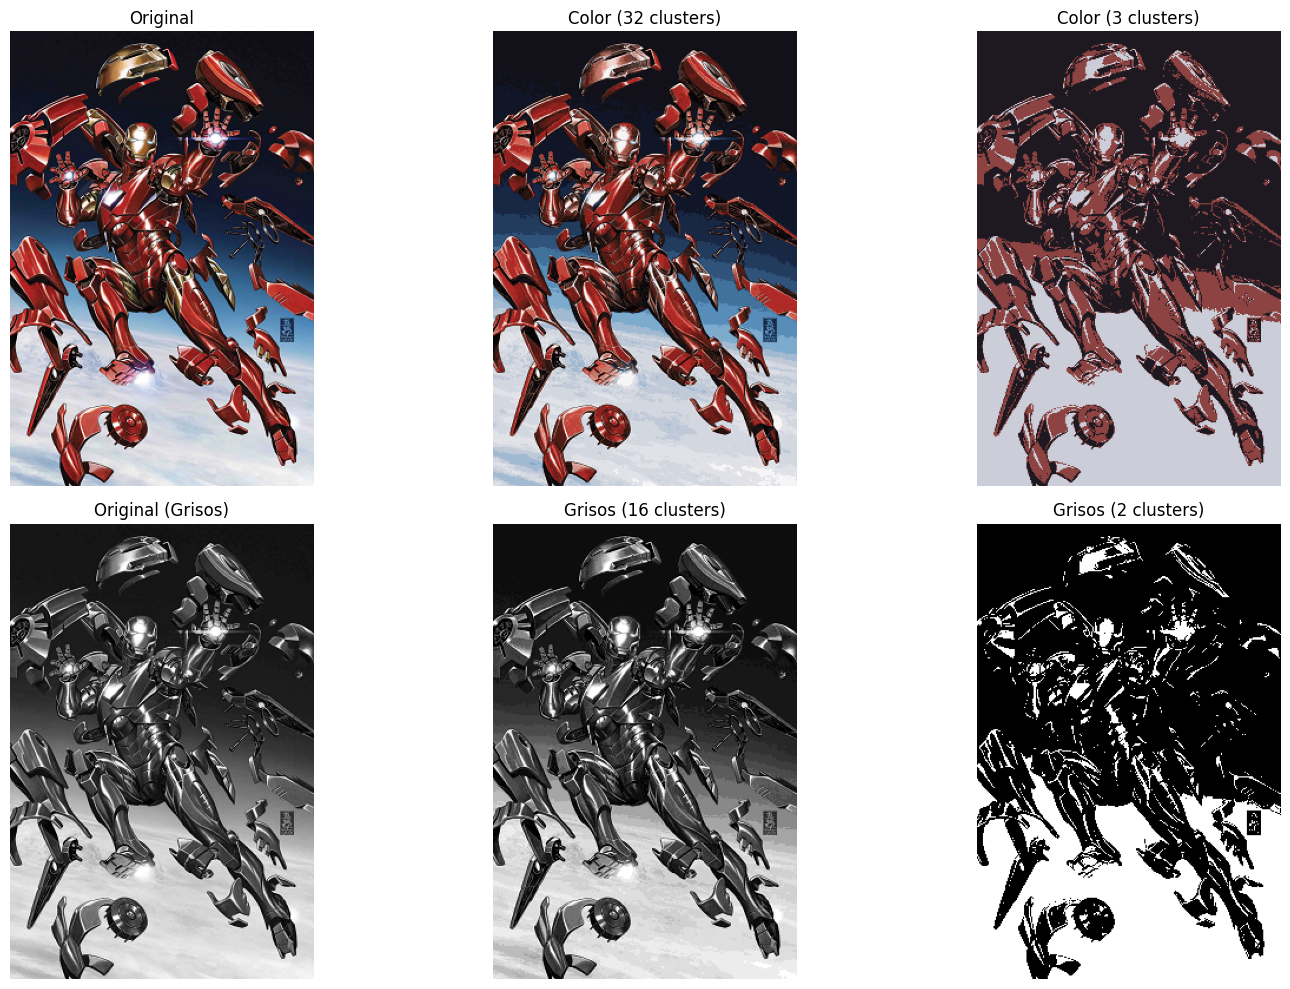


Informació sobre la quantització:
Colors únics en la imatge original: 51016
Colors després de la quantització a 32 colors: 32
Colors després de la quantització a 3 colors: 3

Nivells de gris en la imatge original: 193
Nivells després de la quantització a 16 nivells: 16
Nivells després de la quantització a 2 nivells: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from urllib.request import urlopen
from PIL import Image
import io

def load_image_from_url(url):
    """Carrega una imatge des d'una URL"""
    response = urlopen(url)
    img = Image.open(io.BytesIO(response.read()))
    return np.array(img)

def quantize_colors(image, n_colors):
    """Aplica quantització de color utilitzant K-means"""
    h, w = image.shape[:2]
    pixels = image.reshape(-1, image.shape[-1])
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    labels = kmeans.fit_predict(pixels)
    quantized = kmeans.cluster_centers_[labels].reshape(h, w, -1)
    return quantized.astype(np.uint8)

def quantize_grayscale(image, n_colors):
    """Aplica quantització en escala de grisos"""
    if len(image.shape) > 2:
        gray = np.mean(image, axis=2)
    else:
        gray = image
    pixels = gray.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    labels = kmeans.fit_predict(pixels)
    quantized = kmeans.cluster_centers_[labels].reshape(gray.shape)
    return quantized.astype(np.uint8)

image_url = "https://upload.wikimedia.org/wikipedia/en/4/47/Iron_Man_%28circa_2018%29.png"
image = load_image_from_url(image_url)
plt.figure(figsize=(20, 10))

# imatge original
plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

# molts clusters (32 colors)
quantized_color_high = quantize_colors(image, n_colors=32)
plt.subplot(2, 4, 2)
plt.imshow(quantized_color_high)
plt.title('Color (32 clusters)')
plt.axis('off')

# pocs clusters (3 colors)
quantized_color_low = quantize_colors(image, n_colors=3)
plt.subplot(2, 4, 3)
plt.imshow(quantized_color_low)
plt.title('Color (3 clusters)')
plt.axis('off')

# escala de grisos
gray_image = np.mean(image, axis=2).astype(np.uint8)

# grisos
plt.subplot(2, 4, 5)
plt.imshow(gray_image, cmap='gray')
plt.title('Original (Grisos)')
plt.axis('off')

# grisos amb molts clusters (16 nivells)
quantized_gray_high = quantize_grayscale(gray_image, n_colors=16)
plt.subplot(2, 4, 6)
plt.imshow(quantized_gray_high, cmap='gray')
plt.title('Grisos (16 clusters)')
plt.axis('off')

# grisos amb pocs clusters (2 nivells)
quantized_gray_low = quantize_grayscale(gray_image, n_colors=2)
plt.subplot(2, 4, 7)
plt.imshow(quantized_gray_low, cmap='gray')
plt.title('Grisos (2 clusters)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\nInformació sobre la quantització:")
print(f"Colors únics en la imatge original: {len(np.unique(image.reshape(-1, image.shape[2]), axis=0))}")
print(f"Colors després de la quantització a 32 colors: {len(np.unique(quantized_color_high.reshape(-1, image.shape[2]), axis=0))}")
print(f"Colors després de la quantització a 3 colors: {len(np.unique(quantized_color_low.reshape(-1, image.shape[2]), axis=0))}")
print(f"\nNivells de gris en la imatge original: {len(np.unique(gray_image))}")
print(f"Nivells després de la quantització a 16 nivells: {len(np.unique(quantized_gray_high))}")
print(f"Nivells després de la quantització a 2 nivells: {len(np.unique(quantized_gray_low))}")